In [1]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.model_selection import GridSearchCV

In [12]:
df=pd.read_csv("secom_merge_개선방안2.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [13]:
df

,Pass/Fail,v500,v59,v486,v103,v511,v573,v519,v319,v433,...,v298,v65,v129,v56,v124,v281,v385,v175,v27,v75
0,0,0.000000,-0.435966,1.174663,1.638889,0.000000,0.178901,0.007961,-0.932825,-0.346925,...,-0.543860,0.477294,0.099989,0.092105,1.071429,-0.404255,-0.039795,1.197759,-2.044127,0.732305
1,0,0.000000,-0.026852,-0.257787,1.555556,0.000000,-0.225431,0.007001,-0.972867,0.165089,...,-0.091228,0.198261,0.049995,0.184211,0.714286,0.319149,0.034872,1.647330,0.060856,0.092770
2,0,1.408562,3.779256,-0.309999,1.166667,0.000000,-0.959487,-1.195361,-0.635551,0.102193,...,-0.852632,-0.410046,0.449952,-2.250000,-1.357143,0.702128,-1.187282,0.583388,0.024245,-1.907230
3,0,0.000000,-2.142383,-0.520431,1.555556,0.000000,-0.569595,0.000860,0.828940,-0.513316,...,0.796491,2.615932,-0.450058,-0.157895,-0.500000,0.510638,-0.071795,0.397495,0.004995,-1.825834
4,0,0.000000,4.411632,-0.520431,1.361111,1.123123,0.214200,-1.111166,0.556119,1.514435,...,-0.873684,-1.157181,0.049995,0.078947,0.714286,0.340426,-0.913778,-0.180620,-2.043399,1.011375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,0.000000,-0.353616,-0.520431,-0.194444,1.404988,-0.145207,0.006849,0.378535,-0.513316,...,2.561404,0.340324,-0.500053,0.184211,0.428571,1.234043,0.082462,0.342123,-0.047860,-0.089400
1563,1,0.000000,-0.559263,-0.078133,1.055556,1.175361,-1.217810,0.004741,0.178203,-0.513316,...,0.189474,0.476459,0.449952,0.171053,2.071429,-0.808511,0.136615,0.139750,-0.007613,9.216801
1564,1,1.468708,-0.991111,1.466533,-0.361111,0.000000,-0.020858,0.010467,0.397223,-0.231967,...,1.789474,0.920971,0.549942,0.026316,-0.357143,-0.042553,0.140581,-0.252472,-1.774421,-0.050640
1565,1,1.948862,-1.165949,-0.520431,0.416667,1.083012,-0.383474,0.007191,0.199495,-0.096612,...,0.975439,1.502700,-0.199979,0.394737,-0.071429,-0.638298,0.097778,-0.547132,-0.055376,0.666414


In [14]:
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)

## SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
# train 데이터에서 오버샘플링 시키기
x_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 오버샘플링 적용 후 데이터 레이블 개수 살펴보기
print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', x_train_over.shape, y_train_over.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_over).value_counts())

오버샘플링 전 : (1096, 41) (1096,)

오버샘플링 후 : (2046, 41) (2046,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 1    1023
0    1023
dtype: int64


Class=0, n=1023 (65.284%)
Class=1, n=73 (4.659%)


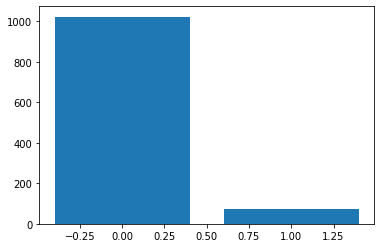

In [17]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=1023 (65.284%)
Class=1, n=1023 (65.284%)


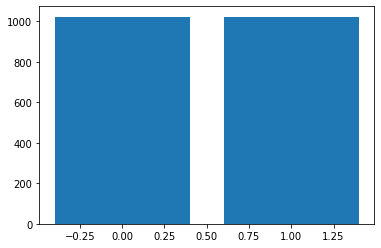

In [18]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train_over)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [19]:
x_train_over = np.array(x_train_over)
X_test = np.array(X_test)

In [20]:
xgb = XGBClassifier(random_state=42)
xgb_parameters = {'n_estimators':[120, 150, 170], 'learning_rate':[0.07, 0.1,0.15], 'max_depth':[2, 3, 4],'min_child_weight':[1]}
xgb_grid = GridSearchCV(xgb, param_grid=xgb_parameters,scoring=make_scorer(recall_score),  cv=3, refit=True)
xgb_grid.fit(x_train_over, y_train_over)
print('최적 하이퍼 파라미터: ', xgb_grid.best_params_)
print('최고 예측 정확도: {:.4f}'.format(xgb_grid.best_score_))

최적 하이퍼 파라미터:  {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 120}
최고 예측 정확도: 0.9844


In [21]:
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(**xgb_grid.best_params_)
xgb_wrapper.fit(x_train_over , y_train_over,  early_stopping_rounds=400, eval_set = evals, eval_metric="logloss",  verbose=True)
xgb_wrapper.fit(x_train_over, y_train_over)

preds = xgb_wrapper.predict(X_test) 
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.65944
[1]	validation_0-logloss:0.63098
[2]	validation_0-logloss:0.60612
[3]	validation_0-logloss:0.59015
[4]	validation_0-logloss:0.56738
[5]	validation_0-logloss:0.55334
[6]	validation_0-logloss:0.53190
[7]	validation_0-logloss:0.52090
[8]	validation_0-logloss:0.50645
[9]	validation_0-logloss:0.49373
[10]	validation_0-logloss:0.48053
[11]	validation_0-logloss:0.47386
[12]	validation_0-logloss:0.46245
[13]	validation_0-logloss:0.45390
[14]	validation_0-logloss:0.44103
[15]	validation_0-logloss:0.43497


C:\Users\82104\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
C:\Users\82104\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[16]	validation_0-logloss:0.42624
[17]	validation_0-logloss:0.41817
[18]	validation_0-logloss:0.41299
[19]	validation_0-logloss:0.40300
[20]	validation_0-logloss:0.39576
[21]	validation_0-logloss:0.39177
[22]	validation_0-logloss:0.38447
[23]	validation_0-logloss:0.37755
[24]	validation_0-logloss:0.37107
[25]	validation_0-logloss:0.36687
[26]	validation_0-logloss:0.36209
[27]	validation_0-logloss:0.35491
[28]	validation_0-logloss:0.35181
[29]	validation_0-logloss:0.34714
[30]	validation_0-logloss:0.34250
[31]	validation_0-logloss:0.34091
[32]	validation_0-logloss:0.33782
[33]	validation_0-logloss:0.33097
[34]	validation_0-logloss:0.32585
[35]	validation_0-logloss:0.32442
[36]	validation_0-logloss:0.31890
[37]	validation_0-logloss:0.31584
[38]	validation_0-logloss:0.31391
[39]	validation_0-logloss:0.31210
[40]	validation_0-logloss:0.30856
[41]	validation_0-logloss:0.30736
[42]	validation_0-logloss:0.30548
[43]	validation_0-logloss:0.30387
[44]	validation_0-logloss:0.29994
[45]	validatio

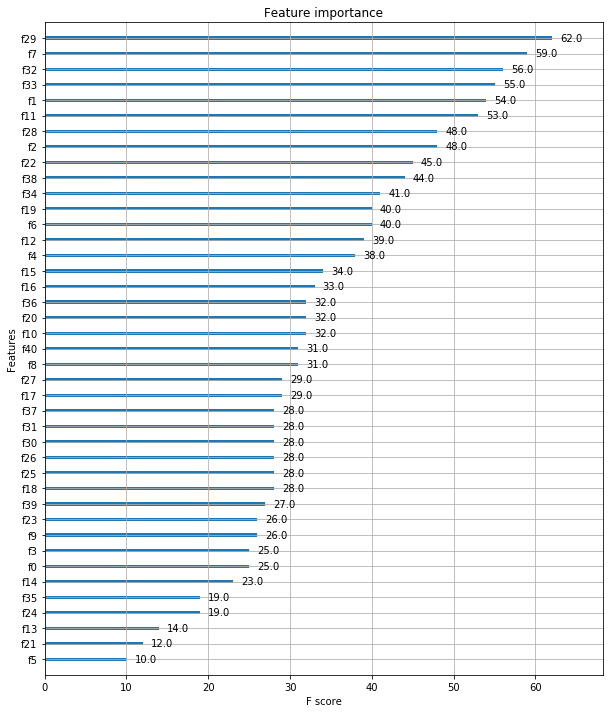

In [22]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12)) 
plot_importance(xgb_wrapper, ax=ax)
#피처의 중요도를 시각화하는 모듈

In [23]:
print(" 정 확 도 : {0:.4f}".format(accuracy_score(y_test,preds)))

 정 확 도 : 0.9023


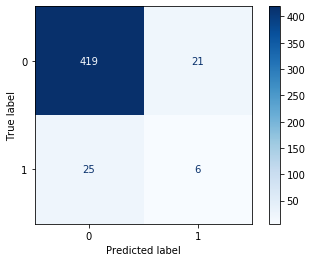

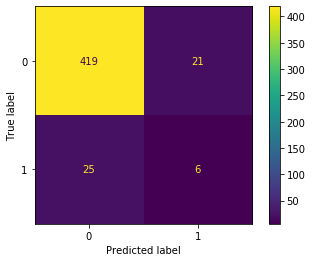

In [24]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,preds, labels=xgb_wrapper.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgb_wrapper.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

confusion matrix=
 [[419  21]
 [ 25   6]]
trainset 정확도:  1.0
testset 정확도:  0.9023354564755839
accuracy=  0.9023354564755839
precision=  0.2222222222222222
recall=  0.1935483870967742
f1 score=  0.20689655172413793
교차 검증=  0.9235610302351625
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       440
           1       0.22      0.19      0.21        31

    accuracy                           0.90       471
   macro avg       0.58      0.57      0.58       471
weighted avg       0.90      0.90      0.90       471



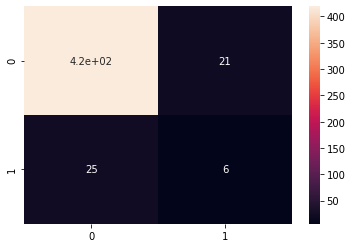

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
print('confusion matrix=\n',confusion_matrix(y_true=y_test,y_pred=preds))
print('trainset 정확도: ',xgb_wrapper.score(x_train_over,y_train_over)) #trainset 정확도
print('testset 정확도: ',xgb_wrapper.score(X_test,y_test)) #testset 정확도
print('accuracy= ',accuracy_score(y_true=y_test,y_pred=preds))
print('precision= ',precision_score(y_true=y_test,y_pred=preds))
print('recall= ',recall_score(y_true=y_test,y_pred=preds))
print('f1 score= ',f1_score(y_true=y_test,y_pred=preds))
print('교차 검증= ',cross_val_score(xgb_wrapper,X_test,y_test).mean())
print(classification_report(y_test,preds))
heat=pd.DataFrame(confusion_matrix(y_test,preds))
sns.heatmap(heat,annot=True)

In [26]:
from sklearn.metrics import classification_report
y_pred = xgb_wrapper.predict(test_x)
accuracy_score(test_y, y_pred)

print(classification_report(test_y, y_pred))

NameError: name 'test_x' is not defined

In [27]:
fpr,tpr,thresholds=roc_curve(test_y,preds,pos_label=1)

NameError: name 'test_y' is not defined

In [28]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, linewidth = 2)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
auc=np.trapz(tpr,fpr)
print("Auc:",auc)

NameError: name 'fpr' is not defined

In [29]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, xgb_wrapper.predict_proba(test_x)[:, 1] )

NameError: name 'test_y' is not defined

## ADASYN
#### SMOTE의 개선된 버전이다. 동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성된다. 즉 모든 표본이 약간 더 분산된다.

In [30]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y_train))

ada = ADASYN(random_state=12)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', X_res.shape, y_res.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_res).value_counts())

Original dataset shape Counter({0: 1023, 1: 73})
Resampled dataset shape Counter({0: 1023, 1: 1003})
오버샘플링 전 : (1096, 41) (1096,)

오버샘플링 후 : (2026, 41) (2026,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1023
1    1003
dtype: int64


In [31]:
df=pd.DataFrame(y_res)
df.columns = ['Pass/Fail']
df=pd.concat([df,X_res], axis=1)
df

,Pass/Fail,v500,v59,v486,v103,v511,v573,v519,v319,v433,...,v298,v65,v129,v56,v124,v281,v385,v175,v27,v75
0,0,1.082916,-0.040513,0.018837,-1.361111,1.421095,0.223827,-0.557788,0.168658,-0.406993,...,-0.414035,-0.305902,-0.400063,-0.105263,0.785714,-0.425532,-0.544547,-1.466711,-0.981452,-0.701803
1,0,0.000000,-0.765507,-0.520431,-0.305556,1.403904,1.307661,0.001966,-0.943641,-0.513316,...,-0.021053,0.368848,-0.700032,-1.802632,-0.285714,-0.106383,0.259145,-0.771259,-0.011395,-1.035137
2,0,0.000000,-0.740835,0.597205,-1.388889,0.000000,-0.385078,0.005527,-0.396882,1.955624,...,1.431579,0.384361,-3.844308,-0.342105,-0.214286,-0.765957,0.227556,0.712591,0.083889,0.197422
3,0,1.734634,-0.678023,1.026151,-1.055556,0.000000,-0.385078,0.001406,0.147150,-0.129460,...,0.073684,1.128554,-2.497728,-0.157895,-0.357143,-0.106383,0.196103,0.670402,-0.053582,-0.628160
4,0,1.167637,0.497630,-0.520431,0.472222,0.000000,-0.079422,0.011556,-0.757628,0.279993,...,1.294737,-0.401821,0.199979,0.526316,0.000000,-0.212766,0.050325,0.113382,-0.042672,1.026879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,1,0.000000,-0.048408,0.459624,-0.500194,0.000000,-0.358735,0.003801,-1.129914,0.628040,...,-0.544328,-0.383521,1.199979,-1.111836,-0.071429,-0.260675,0.239067,0.011927,0.072858,-0.134909
2022,1,0.000000,-0.122102,-0.150446,-0.004621,0.000000,-1.048806,0.005287,-1.141169,1.793407,...,0.653990,-0.352478,1.199979,-1.128603,-0.071429,-0.165778,0.175983,-0.144320,0.070078,-0.221346
2023,1,0.000000,-0.466413,-0.107912,0.024518,0.511658,-0.850482,0.004895,-0.676466,1.588960,...,0.641666,0.053778,0.882380,-0.757463,-0.049823,-0.232600,0.174259,-0.106849,0.069100,-0.047932
2024,1,0.000000,-0.709296,0.002672,-0.018609,0.886843,-0.615250,0.004415,-0.334247,1.287384,...,0.476680,0.347635,0.649493,-0.483134,-0.033980,-0.293948,0.181205,-0.059039,0.068745,0.090477


In [32]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1418, 41) (608, 41) (1418, 1) (608, 1)


In [33]:
evals = [(test_x, test_y)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(train_x , train_y,  early_stopping_rounds=400, eval_set = evals, eval_metric="logloss",  verbose=True)
xgb_wrapper.fit(train_x, train_y)

preds = xgb_wrapper.predict(test_x) 
pred_proba = xgb_wrapper.predict_proba(test_x)[:,1]

[0]	validation_0-logloss:0.66639
[1]	validation_0-logloss:0.64304
[2]	validation_0-logloss:0.62169
[3]	validation_0-logloss:0.60276
[4]	validation_0-logloss:0.58411
[5]	validation_0-logloss:0.56984
[6]	validation_0-logloss:0.55410
[7]	validation_0-logloss:0.53941
[8]	validation_0-logloss:0.52432
[9]	validation_0-logloss:0.51261
[10]	validation_0-logloss:0.49970
[11]	validation_0-logloss:0.48882
[12]	validation_0-logloss:0.47442
[13]	validation_0-logloss:0.46124
[14]	validation_0-logloss:0.45244
[15]	validation_0-logloss:0.44133


C:\Users\82104\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
C:\Users\82104\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[16]	validation_0-logloss:0.43071
[17]	validation_0-logloss:0.42270
[18]	validation_0-logloss:0.41374
[19]	validation_0-logloss:0.40617
[20]	validation_0-logloss:0.39961
[21]	validation_0-logloss:0.39268
[22]	validation_0-logloss:0.38485
[23]	validation_0-logloss:0.37815
[24]	validation_0-logloss:0.37350
[25]	validation_0-logloss:0.36792
[26]	validation_0-logloss:0.36144
[27]	validation_0-logloss:0.35514
[28]	validation_0-logloss:0.35050
[29]	validation_0-logloss:0.34463
[30]	validation_0-logloss:0.34023
[31]	validation_0-logloss:0.33440
[32]	validation_0-logloss:0.32922
[33]	validation_0-logloss:0.32470
[34]	validation_0-logloss:0.32154
[35]	validation_0-logloss:0.31670
[36]	validation_0-logloss:0.31332
[37]	validation_0-logloss:0.30830
[38]	validation_0-logloss:0.30336
[39]	validation_0-logloss:0.29894
[40]	validation_0-logloss:0.29463
[41]	validation_0-logloss:0.29027
[42]	validation_0-logloss:0.28635
[43]	validation_0-logloss:0.28415
[44]	validation_0-logloss:0.28137
[45]	validatio

[253]	validation_0-logloss:0.09775
[254]	validation_0-logloss:0.09752
[255]	validation_0-logloss:0.09742
[256]	validation_0-logloss:0.09751
[257]	validation_0-logloss:0.09744
[258]	validation_0-logloss:0.09706
[259]	validation_0-logloss:0.09706
[260]	validation_0-logloss:0.09687
[261]	validation_0-logloss:0.09710
[262]	validation_0-logloss:0.09702
[263]	validation_0-logloss:0.09688
[264]	validation_0-logloss:0.09689
[265]	validation_0-logloss:0.09681
[266]	validation_0-logloss:0.09676
[267]	validation_0-logloss:0.09700
[268]	validation_0-logloss:0.09699
[269]	validation_0-logloss:0.09685
[270]	validation_0-logloss:0.09694
[271]	validation_0-logloss:0.09665
[272]	validation_0-logloss:0.09657
[273]	validation_0-logloss:0.09621
[274]	validation_0-logloss:0.09644
[275]	validation_0-logloss:0.09624
[276]	validation_0-logloss:0.09583
[277]	validation_0-logloss:0.09564
[278]	validation_0-logloss:0.09535
[279]	validation_0-logloss:0.09539
[280]	validation_0-logloss:0.09531
[281]	validation_0-l

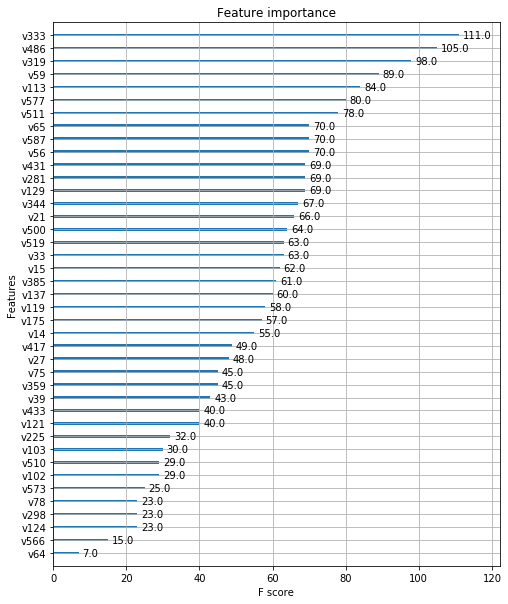

In [35]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 10)) 
plot_importance(xgb_wrapper, ax=ax)
#피처의 중요도를 시각화하는 모듈

In [113]:
print(" 정 확 도 : {0:.4f}".format(accuracy_score(test_y,preds)))

 정 확 도 : 0.9836


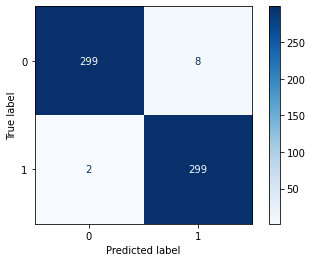

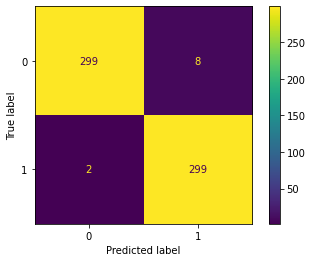

In [114]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y,preds, labels=xgb_wrapper.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgb_wrapper.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

confusion matrix=
 [[430  10]
 [ 25   6]]
trainset 정확도:  1.0
testset 정확도:  0.9256900212314225
accuracy=  0.9256900212314225
precision=  0.375
recall=  0.1935483870967742
f1 score=  0.25531914893617014
교차 검증=  0.9341993281075028
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       440
           1       0.38      0.19      0.26        31

    accuracy                           0.93       471
   macro avg       0.66      0.59      0.61       471
weighted avg       0.91      0.93      0.91       471



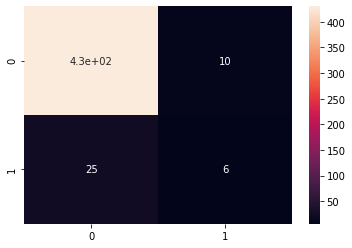

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
print('confusion matrix=\n',confusion_matrix(y_true=y_test,y_pred=preds))
print('trainset 정확도: ',xgb_wrapper.score(x_train_over,y_train_over)) #trainset 정확도
print('testset 정확도: ',xgb_wrapper.score(X_test,y_test)) #testset 정확도
print('accuracy= ',accuracy_score(y_true=y_test,y_pred=preds))
print('precision= ',precision_score(y_true=y_test,y_pred=preds))
print('recall= ',recall_score(y_true=y_test,y_pred=preds))
print('f1 score= ',f1_score(y_true=y_test,y_pred=preds))
print('교차 검증= ',cross_val_score(xgb_wrapper,X_test,y_test).mean())
print(classification_report(y_test,preds))
heat=pd.DataFrame(confusion_matrix(y_test,preds))
sns.heatmap(heat,annot=True)

In [116]:
fpr,tpr,thresholds=roc_curve(test_y,preds,pos_label=1)

Auc: 0.9836484249028753


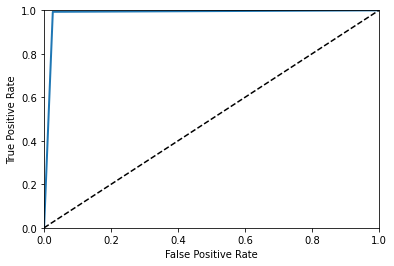

In [117]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, linewidth = 2)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
auc=np.trapz(tpr,fpr)
print("Auc:",auc)

In [118]:
from sklearn.metrics import classification_report
y_pred = xgb_wrapper.predict(test_x)
accuracy_score(test_y, y_pred)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       307
           1       0.97      0.99      0.98       301

    accuracy                           0.98       608
   macro avg       0.98      0.98      0.98       608
weighted avg       0.98      0.98      0.98       608



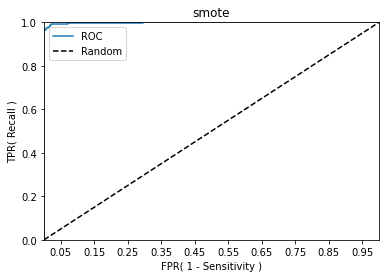

In [119]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, xgb_wrapper.predict_proba(test_x)[:, 1] )